As a followup to the previous blog post, this notebook will examine the Equivalent Point Buy for algorithms involving four-sided, eight-sided, ten-sided, and twelve-sided dice:

* Algorithm 8- Roll 2 eight-sided dice, Add 2, Take the Sum, Repeat 6 Times
* Algorithm 9- Roll 2 eight-sided dice, Add 2, Take the Sum, Repeat 7 Times, Drop the Lowest
* Algorithm 10- Roll 4 four-sided dice, Add 2, Take the Sum, Repeat 6 Times
* Algorithm 11- Roll 4 four-sided dice, Add 2, Take the Sum, Repeat 7 Times, Drop the Lowest
* Algorithm 12- Roll 3 four-sided dice, Add 6, Take the Sum, Repeat 6 Times
* Algorithm 13- Roll 1 twelve-sided dice, Add 6, Take the Sum, Repeat 6 Times
* Algorithm 14- Roll 1 ten-sided dice, Add 8, Take the Sum, Repeat 6 Times
* Algorithm 15- Roll 1 eight-sided dice, Add 10, Take the Sum, Repeat 6 Times
* Algorithm 16- Roll 2 four-sided dice, Add 10, Take the Sum, Repeat 6 Times

In general, the rolling methods involving eight-sided dice will have higher variance compared to six-sided dice, while the four-sided dice will have lower variance. Although, of course, the number of dice rolled also affects the variance (for example, Algorithm 13 has lower variance than some of the six-sided dice algorithms). If you want more consistent results than for the six-sided dice from the previous post, you should typically choose four-sided dice, and if you're feeling lucky, choose eight-sided dice or higher.

In [1]:
# See previous post for more explanation
import numpy as np
import seaborn as sns
from random import randint
from scipy.stats import norm
from heapq import nlargest
import matplotlib.pyplot as plt
% matplotlib inline

vmap = {3:-16, 4:-12, 5:-9, 6:-6, 7:-4, 8:-2, 
        9:-1, 10:0, 11:1, 12:2, 13:3, 14:5, 
        15:7, 16:10, 17:13, 18:17}

# For most of these cases, the Monte Carlo solution is overkill- I 
# could just simulate all possible combinations. However, I already
# had the code pretty much written, so I just did it roughly the same way
# mc_solution2 is modified from mc_solution accordingly
def mc_solution2(num_hist, num_dice, dice_type, add_value, num_reps, 
                 drop_low_rep=False):
    raw_res = []
    val_res = []
    for _ in range(num_hist):
        roll_sums = []
        for _ in range(num_reps):
            rolls = [randint(1,dice_type) for _ in range(num_dice)]
            roll_sums.append(sum(rolls) + add_value)
        if drop_low_rep:
            roll_sums = nlargest(6,roll_sums)
        avg_roll_sums = np.median(roll_sums)
        raw_res.append(avg_roll_sums)
        point_buy_sum = np.sum([vmap[value] for value in roll_sums])
        val_res.append(point_buy_sum)
    return raw_res, val_res

def plot_hist(raw_data, val_data, title, bins):
    f,(ax1,ax2) = plt.subplots(1, 2, figsize=(8,5))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.suptitle(title, fontsize=14)
    sns.distplot(raw_data, kde=False, bins=bins, fit=norm, ax=ax1)       
    ax1.text(0.05, 0.95, build_text(raw_data), transform=ax1.transAxes, 
             fontsize=12, verticalalignment='top', bbox=props)
    ax1.set_xlabel('Raw Results')   
    ax1.set_ylabel('Probability')
    ax1.set_xlim([3,18])
    sns.distplot(val_data, kde=False, fit=norm, ax=ax2)    
    ax2.text(0.05, 0.95, build_text(val_data), transform=ax2.transAxes, 
             fontsize=12, verticalalignment='top', bbox=props)
    ax2.set_xlabel('Equivalent Point Buy')
    
def build_text(data):
    ret_string = '$\mu$={:.1f}\n$\sigma$={:.2f}\n95%={:.0f}\n5%={:.0f}'.format(
                 np.mean(data), np.std(data), np.percentile(data,95), 
                 np.percentile(data,5))
    return ret_string

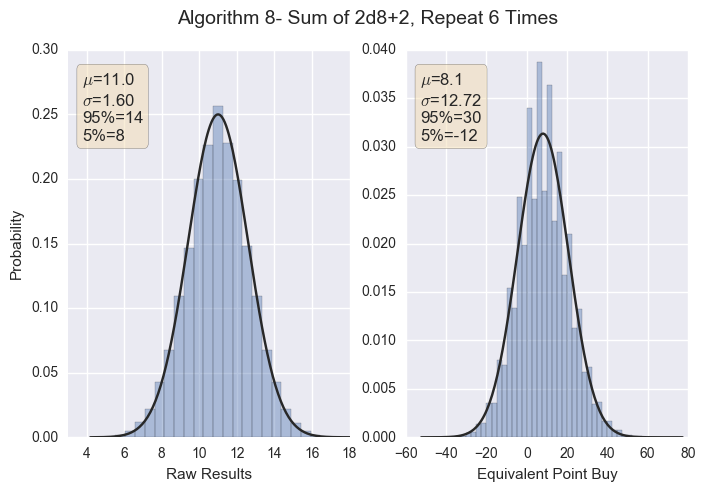

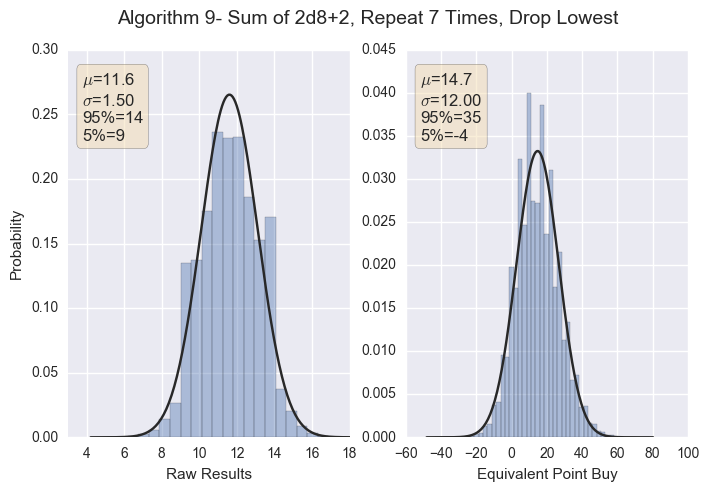

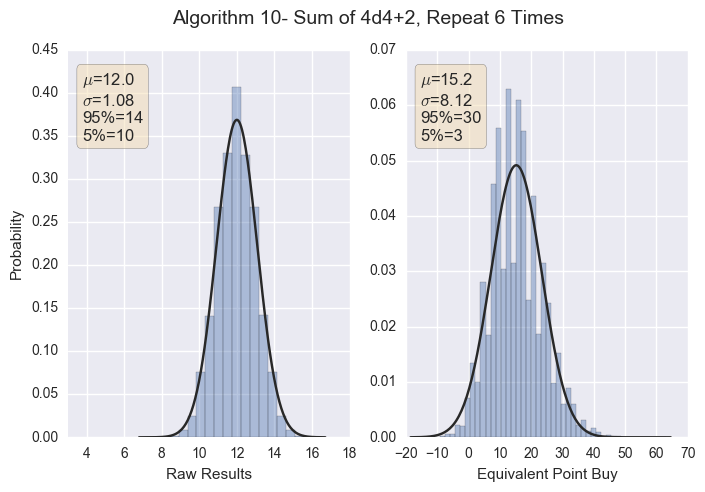

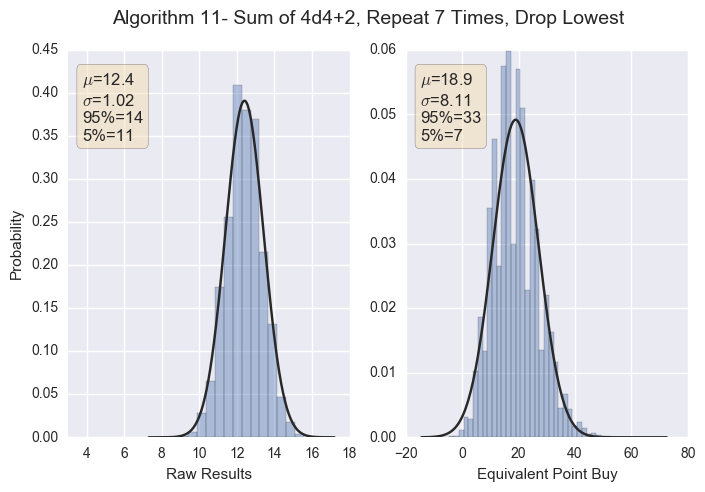

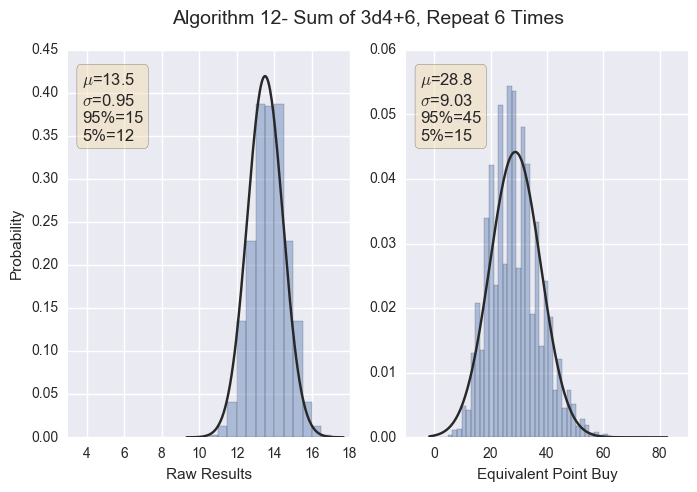

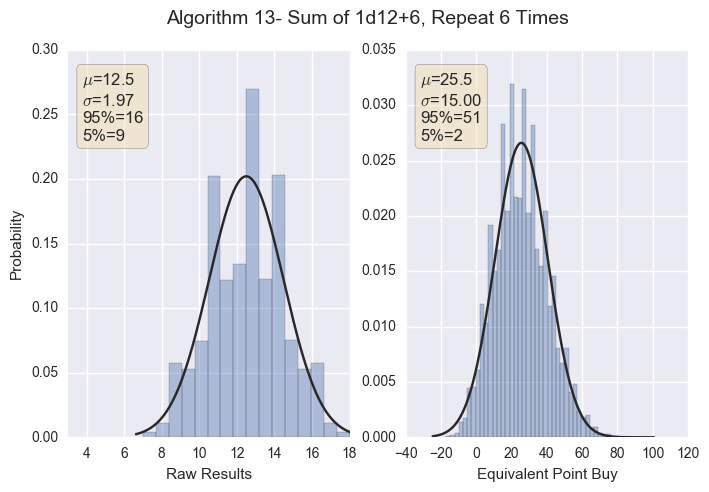

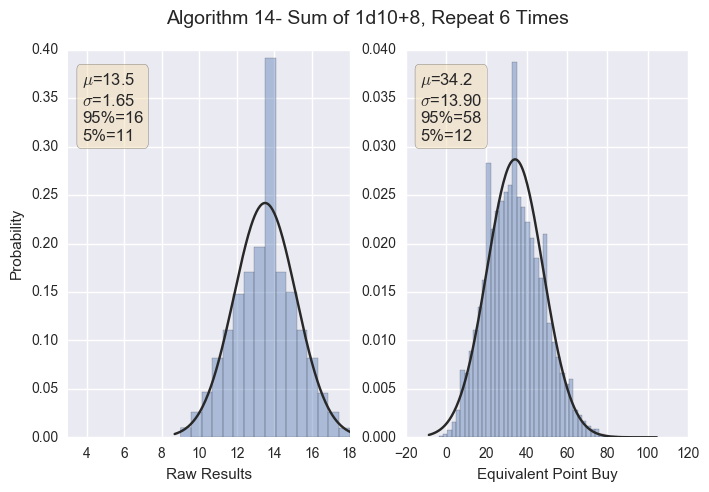

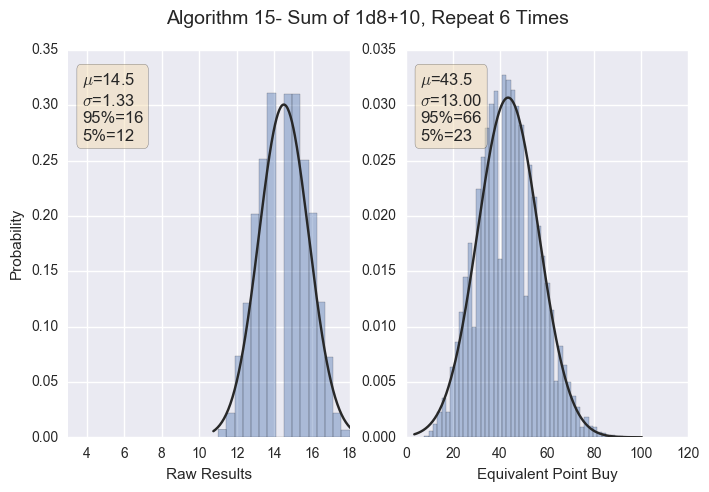

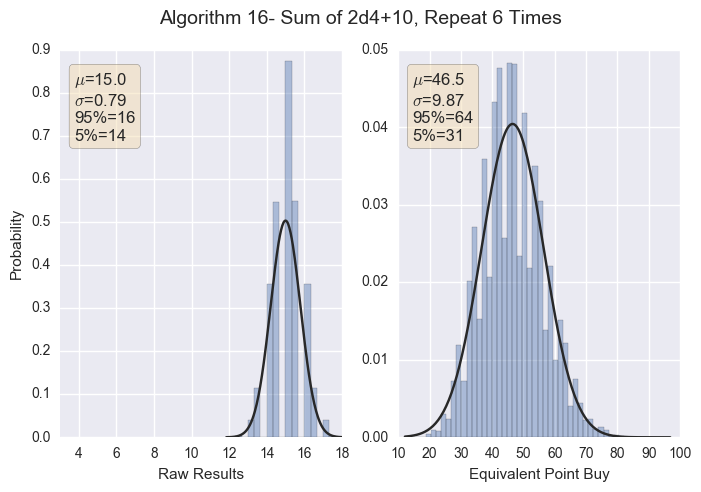

In [2]:
num_hist = 10**6
alg1_raw, alg1_val = mc_solution2(num_hist, 2, 8, 2, 6)
alg2_raw, alg2_val = mc_solution2(num_hist, 2, 8, 2, 7, drop_low_rep=True)
alg3_raw, alg3_val = mc_solution2(num_hist, 4, 4, 2, 6)
alg4_raw, alg4_val = mc_solution2(num_hist, 4, 4, 2, 7, drop_low_rep=True)
alg5_raw, alg5_val = mc_solution2(num_hist, 3, 4, 6, 6)
alg6_raw, alg6_val = mc_solution2(num_hist, 1, 12, 6, 6)
alg7_raw, alg7_val = mc_solution2(num_hist, 1, 10, 8, 6)
alg8_raw, alg8_val = mc_solution2(num_hist, 1, 8, 10, 6)
alg9_raw, alg9_val = mc_solution2(num_hist, 2, 4, 10, 6)
plot_hist(alg1_raw, alg1_val,"Algorithm 8- Sum of 2d8+2, Repeat 6 Times", 26)
plot_hist(alg2_raw, alg2_val,"Algorithm 9- Sum of 2d8+2, " +
          "Repeat 7 Times, Drop Lowest", 24)
plot_hist(alg3_raw, alg3_val,"Algorithm 10- Sum of 4d4+2, Repeat 6 Times", 20)
plot_hist(alg4_raw, alg4_val,"Algorithm 11- Sum of 4d4+2, " +
          "Repeat 7 Times, Drop Lowest", 20)
plot_hist(alg5_raw, alg5_val,"Algorithm 12- Sum of 3d4+6, Repeat 6 Times", 16)
plot_hist(alg6_raw, alg6_val,"Algorithm 13- Sum of 1d12+6, Repeat 6 Times", 16)
plot_hist(alg7_raw, alg7_val,"Algorithm 14- Sum of 1d10+8, Repeat 6 Times", 16)
plot_hist(alg8_raw, alg8_val,"Algorithm 15- Sum of 1d8+10, Repeat 6 Times", 16)
plot_hist(alg9_raw, alg9_val,"Algorithm 16- Sum of 2d4+10, Repeat 6 Times", 18)

In [3]:
from tabulate import tabulate
def br(data, description):
    return [description, round(np.mean(data),1), round(np.std(data),2), 
            int(np.percentile(data,5)), int(np.percentile(data,95))]
raw_res = [["Description","Mean","Std","5%","95%"],
           br(alg1_raw, "8. Sum of 2d8+2, Repeat 6"),
           br(alg2_raw, "9. Sum of 2d8+2, Repeat 7, Drop Lowest"),
           br(alg3_raw, "10. Sum of 4d4+2, Repeat 6"),
           br(alg4_raw, "11. Sum of 4d4+2, Repeat 7, Drop Lowest"),
           br(alg5_raw, "12. Sum of 3d4+6, Repeat 6"),
           br(alg6_raw, "13. Sum of 1d12+6, Repeat 6"),
           br(alg7_raw, "14. Sum of 1d10+8, Repeat 6"),
           br(alg8_raw, "15. Sum of 1d8+10, Repeat 6"),
           br(alg9_raw, "16. Sum of 2d4+10, Repeat 6")]
print("Raw Results")
print(tabulate(raw_res))
val_res = [["Description","Mean","Std","5%","95%"],
           br(alg1_val, "8. Sum of 2d8+2, Repeat 6"),
           br(alg2_val, "9. Sum of 2d8+2, Repeat 7, Drop Lowest"),
           br(alg3_val, "10. Sum of 4d4+2, Repeat 6"),
           br(alg4_val, "11. Sum of 4d4+2, Repeat 7, Drop Lowest"),
           br(alg5_val, "12. Sum of 3d4+6, Repeat 6"),
           br(alg6_val, "13. Sum of 1d12+6, Repeat 6"),
           br(alg7_val, "14. Sum of 1d10+8, Repeat 6"),
           br(alg8_val, "15. Sum of 1d8+10, Repeat 6"),
           br(alg9_val, "16. Sum of 2d4+10, Repeat 6")]
print("\nEquivalent Point Buy")
print(tabulate(val_res))

Raw Results
---------------------------------------  ----  ----  --  ---
Description                              Mean  Std   5%  95%
8. Sum of 2d8+2, Repeat 6                11.0  1.6   8   13
9. Sum of 2d8+2, Repeat 7, Drop Lowest   11.6  1.5   9   14
10. Sum of 4d4+2, Repeat 6               12.0  1.08  10  14
11. Sum of 4d4+2, Repeat 7, Drop Lowest  12.4  1.02  11  14
12. Sum of 3d4+6, Repeat 6               13.5  0.95  12  15
13. Sum of 1d12+6, Repeat 6              12.5  1.97  9   16
14. Sum of 1d10+8, Repeat 6              13.5  1.65  11  16
15. Sum of 1d8+10, Repeat 6              14.5  1.33  12  16
16. Sum of 2d4+10, Repeat 6              15.0  0.79  13  16
---------------------------------------  ----  ----  --  ---

Equivalent Point Buy
---------------------------------------  ----  -----  ---  ---
Description                              Mean  Std    5%   95%
8. Sum of 2d8+2, Repeat 6                8.1   12.72  -12  30
9. Sum of 2d8+2, Repeat 7, Drop Lowest   14.7  12.0   -

### Interpretation
These dice rolling algorithms will fall within the following buckets, with those in the previous blog post included as well:

**5-Point Buy**
* Sum of 3 Six-Sided Dice, Repeat 6 Times

**10-Point Buy**
* Sum of 3 Six-Sided Dice, Repeat 7 Times, Drop Lowest
* (High Variance) Sum of 2d8+2, Repeat 6 Times

**15-Point Buy**
* Sum of 3 Six-Sided Dice, Repeat 9 Times, Keep Best 6
* (Low Variance) Sum of 4d4+2, Repeat 6 Times
* (High Variance) Sum of 2d8+2, Repeat 7 Times, Drop Lowest

**20-Point Buy**
* Sum of 4 Six-Sided Dice, Drop Lowest, Repeat 6 Times
* (Low Variance) Sum of 4d4+2, Repeat 7 Times, Drop Lowest

**25-Point Buy**
* Sum of 4 Six-Sided Dice, Drop Lowest, Repeat 7 Times, Drop Lowest
* Sum of 2 Six-Sided Dice, Add 6, Repeat 6 Times
* (High Variance) Sum of 1d12+6, Repeat 6 Times

**30-Point Buy**
* Sum of 5 Six-Sided Dice, Drop the 2 Lowest, Repeat 6 Times
* (Low Variance) Sum of 3d4+6, Repeat 6 Times

**35-Point Buy**
* (High Variance) Sum of 1d10+8, Repeat 6 Times

**45-Point Buy**
* (Low Variance) Sum of 2d4+10, Repeat 6 Times
* (High Variance) Sum of 1d8+10, Repeat 6 Times

If you're allowing players to individually decide whether to use Point Buy or random rolling, this table can be consulted to fairly select which method to use. Random rolling is, of course, random, so the player might get values much lower or higher than the equivalent Point Buy above. In general, you probably want to choose the (Low Variance) option for each bucket, if it is available, unless you strongly prefer six-sided dice.